## Regressão

O objetivo deste exercício é introduzir e praticar conceitos de Regressão. Para isso utilizaremos 2 bases: <i>Advertising.csv</i> e <i>Portland_housePrices.csv</i>

In [2]:
import pandas as pd

dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<i>Advertising</i> é um conjunto de dados relacionando o montante de vendas (<i>sales</i>) com o montante investido em marketing em diferentes médias (<i>TV</i>,<i>radio</i> e <i>newspaper</i>).

Por sua vez, <i>Portland_housePrices</i> relaciona o preço de casas com seu tamanho e número de quartos.



In [3]:
dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Como treinar e usar modelos?
Para virtualmente qualquer tipo de algoritmo de Regressão, existirá uma função <i>fit</i> para treinar o modelo.

Por exemplo, para a regressão linear:

```python
 reg = LinearRegression().fit(X,y)
``` 

Onde <i> X </i> se refere aos atributos de treinamento e <i>y</i> à variável resposta.


In [4]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression()

Após treinado, o modelo pode ser utilizado para fazer predições (prever <i>y</i> para novos exemplos), através da função <i>predict</i>

In [5]:
y_hat = reg.predict(X[0:4])
y_hat

array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059]])

## Regressão Linear Univariada

O framework disponibiliza uma classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a> que implementa regressão linear com o método de mínimos quadrados:

```python
linear_model = LinearRegression()
linear_model.fit(X,y)
linear_model.predict(X)

```
## Avaliando Modelos

Existem algumas formas de inspecionar ou avaliar o modelo aprendido. A primeira forma é visualizar o modelo em um gráfico.



Text(0, 0.5, 'Preço')

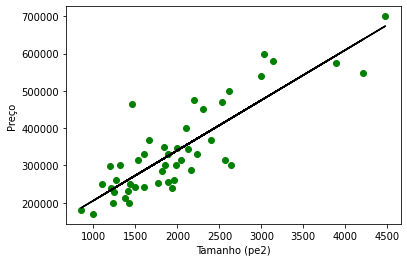

In [6]:
from matplotlib import pyplot as plt

plt.scatter(X, y,color='g')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

Quando há mais de um atributo preditor, visualizar o modelo torna-se difícil, mas ainda é possível avaliar o modelo através do <b>erro quadrático (RSS)</b> ou a métrica <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html"><b>R^2</b></a>

In [7]:
from sklearn.metrics import r2_score
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

In [8]:
rss = calc_rss(y,reg.predict(X))
r2 = calc_r2(y,reg.predict(X))
print(rss)
print(r2)

193464477600.7059
0.6320180251851147


# Exercício 1
Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?

2) O RSS e R^2 corroboram suas impressões observando o modelo?




In [9]:
X_size = dados_por[['tamanho']]
y_size = dados_por[['preco']]

In [10]:
X_rooms = dados_por[['quartos']]
y_rooms = dados_por[['preco']]

In [11]:
reg_size = LinearRegression().fit(X_size, y_size)
reg_size

LinearRegression()

In [12]:
reg_rooms = LinearRegression().fit(X_rooms, y_rooms)
reg_rooms

LinearRegression()

In [13]:
y_hat_size = reg.predict(X_size)
y_hat_size

array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059],
       [474846.35560945],
       [338303.18857341],
       [277632.28381158],
       [263238.07802551],
       [256915.38950266],
       [272251.27230277],
       [332249.550626  ],
       [340321.06788921],
       [325523.28623999],
       [673674.73085997],
       [241848.557278  ],
       [380678.65420528],
       [248843.87223945],
       [237543.74807095],
       [422246.96811084],
       [479016.63952878],
       [308976.6758504 ],
       [325254.23566454],
       [287049.053952  ],
       [335209.10695584],
       [594573.86168047],
       [219248.30894099],
       [267408.36194484],
       [411081.36923006],
       [367226.12543326],
       [426013.67616701],
       [318662.49656625],
       [205795.78016897],
       [345702.07939802],
       [493276.32002713],
       [314895.78851009],
       [264583.33090272],
       [237947.32393411],
       [358078.40586828],
       [6382

In [14]:
y_hat_rooms = reg.predict(X_rooms)
y_hat_rooms

array([[71674.06831189],
       [71674.06831189],
       [71674.06831189],
       [71539.54302417],
       [71808.59359961],
       [71808.59359961],
       [71674.06831189],
       [71674.06831189],
       [71674.06831189],
       [71674.06831189],
       [71808.59359961],
       [71674.06831189],
       [71674.06831189],
       [71943.11888733],
       [71674.06831189],
       [71808.59359961],
       [71539.54302417],
       [71674.06831189],
       [71808.59359961],
       [71808.59359961],
       [71674.06831189],
       [71539.54302417],
       [71674.06831189],
       [71808.59359961],
       [71674.06831189],
       [71674.06831189],
       [71674.06831189],
       [71674.06831189],
       [71674.06831189],
       [71674.06831189],
       [71539.54302417],
       [71405.01773645],
       [71808.59359961],
       [71674.06831189],
       [71808.59359961],
       [71674.06831189],
       [71674.06831189],
       [71808.59359961],
       [71808.59359961],
       [71808.59359961],


Text(0, 0.5, 'Preço')

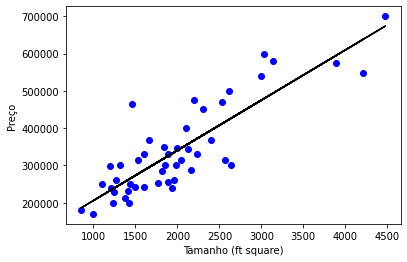

In [15]:
plt.scatter(X_size, y_size,color='b') 
plt.plot(X_size, reg.predict(X_size),color='black') 
plt.xlabel('Tamanho (ft square)') 
plt.ylabel('Preço') 

Text(0, 0.5, 'Preço')

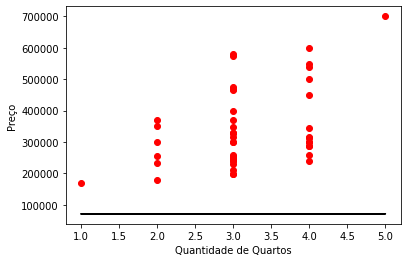

In [17]:
plt.scatter(X_rooms, y_rooms,color='r') 
plt.plot(X_rooms, reg.predict(X_rooms),color='black') 
plt.xlabel('Quantidade de Quartos') 
plt.ylabel('Preço') 

In [19]:
rss_size = calc_rss(y_size,reg.predict(X_size))
r2_size = calc_r2(y_size,reg.predict(X_size))

In [20]:
rss_rooms = calc_rss(y_rooms,reg.predict(X_rooms))
r2_rooms = calc_r2(y_rooms,reg.predict(X_rooms))

In [21]:
print("TAMANHO:")
print(f'rss = {rss_size}')
print(f'r2 = {r2_size}')
print()
print("QUARTOS:")
print(f'rss = {rss_rooms}')
print(f'r2 = {r2_rooms}')

TAMANHO:
rss = 193464477600.7059
r2 = 0.6320180251851147

QUARTOS:
rss = 4112470394446.1113
r2 = -8530773.348780483


# Exercício 2

Treine modelos lineares na base <i>Advertising.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?

2) Qual dos modelos é melhor? como você chegou a esta conclusão?

In [22]:
X_tv = dados_adv[['TV']]
y_tv = dados_adv[['sales']]

X_radio = dados_adv[['radio']]
y_radio = dados_adv[['sales']]

X_news = dados_adv[['newspaper']]
y_news = dados_adv[['sales']]

In [23]:
LinearRegression().fit(X_tv, y_tv)

LinearRegression()

In [24]:
LinearRegression().fit(X_radio, y_radio)

LinearRegression()

In [25]:
LinearRegression().fit(X_news, y_news)

LinearRegression()

In [26]:
y_hat_tv = reg.predict(X_tv)

y_hat_radio = reg.predict(X_radio)

y_hat_news = reg.predict(X_news)

Text(0, 0.5, 'Sales')

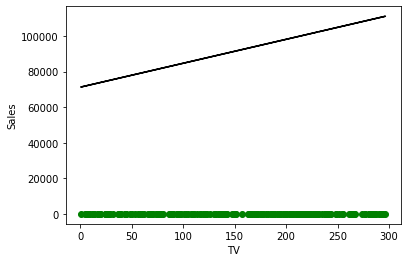

In [27]:
plt.scatter(X_tv, y_tv, color='g') 
plt.plot(X_tv, reg.predict(X_tv), color='black') 
plt.xlabel('TV') 
plt.ylabel('Sales') 

Text(0, 0.5, 'Sales')

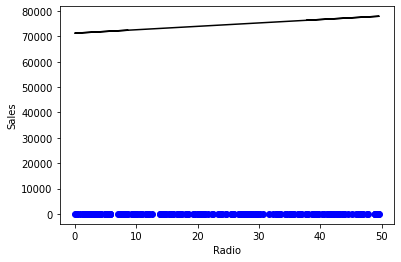

In [28]:
plt.scatter(X_radio, y_radio, color='b') 
plt.plot(X_radio, reg.predict(X_radio), color='black') 
plt.xlabel('Radio') 
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

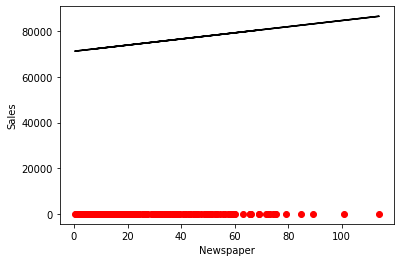

In [29]:
plt.scatter(X_news, y_news,color='r') 
plt.plot(X_news, reg.predict(X_news),color='black') 
plt.xlabel('Newspaper') 
plt.ylabel('Sales') 

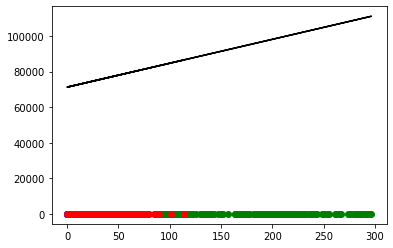

In [30]:
plt.scatter(X_tv, y_tv,color='g') 
plt.plot(X_tv, reg.predict(X_tv),color='black') 
plt.scatter(X_radio, y_radio, color='b') 
plt.plot(X_radio, reg.predict(X_radio),color='black') 
plt.scatter(X_news, y_news,color='r') 
plt.plot(X_news, reg.predict(X_news),color='black') 

In [31]:
# tv
rss_tv = calc_rss(y_tv,reg.predict(X_tv))
r2_tv = calc_r2(y_tv,reg.predict(X_tv))
# radio
rss_radio = calc_rss(y_radio,reg.predict(X_radio))
r2_radio = calc_r2(y_radio,reg.predict(X_radio))
# newspaper
rss_news = calc_rss(y_news,reg.predict(X_news))
r2_news = calc_r2(y_news,reg.predict(X_news))

In [32]:
print("TV:")
print(f'rss = {rss_tv}')
print(f'r2 = {r2_tv}')
print()
print("RADIO:")
print(f'rss = {rss_radio}')
print(f'r2 = {r2_radio}')
print()
print("NEWSPAPER:")
print(f'rss = {rss_news}')
print(f'r2 = {r2_news}')

TV:
rss = 1684088153018.6035
r2 = -62.442520144897266

RADIO:
rss = 1107448815191.798
r2 = -1394.0715238032265

NEWSPAPER:
rss = 1137736319113.8887
r2 = -665.0700998165673


# Exercício 3

1. Compare os resultados das duas regressões com a implemtação do KNN-Regressor visto na aula passada.

1. Utilizando a API do scikit-learn para criação de partições de treino e teste, refaça a sua regressão nas partições de treino e faça a validação nas partições de teste.

    1. Comparar os resultados na partição de treino e teste;
    1. Comparar desempenho com a regressão na qual não foi feita a separação entre treino e teste. Você acha que o desempenho deveria ser melhor ou pior nesse caso? É possível dizer que os modelos treinados no dataset completo generalizam?


In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import model_selection as ms

## Advertising
---

In [34]:
X_adv = dados_adv[['TV', 'radio', 'newspaper']]
y_adv = dados_adv[['sales']]

In [35]:
splits = ms.train_test_split(X_adv, y_adv, test_size=0.2)
X_adv_train, X_adv_test, y_adv_train, y_adv_test = splits

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaler_previsores = scaler.fit(X_adv_train)
X_train = scaler_previsores.transform(X_adv_train)
X_test = scaler_previsores.transform(X_adv_test)

In [39]:
model_adv = KNeighborsRegressor(n_neighbors=3)

In [40]:
model_adv.fit(X_adv_train, y_adv_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
expected_adv = y_adv_test
predicted_adv = model_adv.predict(X_adv_test)

In [42]:
print ("Dados de teste")
print ("MSE: " + str(metrics.mean_squared_error(expected_adv, predicted_adv)))
print ("R2: " + str(metrics.r2_score(expected_adv, predicted_adv)))

Dados de teste
MSE: 1.2248611111111114
R2: 0.9543649777206499


## House Prices 
---

In [43]:
X_port = dados_por[['tamanho',	'quartos']]
y_port = dados_por[['preco']]

In [44]:
splits = ms.train_test_split(X_port, y_port, test_size=0.2)
X_port_train, X_port_test, y_port_train, y_port_test = splits

In [45]:
scaler_previsores = scaler.fit(X_port_train)
X_port = scaler_previsores.transform(X_port_train)
X_port = scaler_previsores.transform(X_port_test)

In [46]:
model_port = KNeighborsRegressor(n_neighbors=3)

In [47]:
model_port.fit(X_port_train, y_port_train)

KNeighborsRegressor(n_neighbors=3)

In [48]:
expected_port = y_port_test
predicted_port = model_port.predict(X_port_test)

In [51]:
print ("Dados de teste")
print ("MSE: " + str(metrics.mean_squared_error(expected_port, predicted_port)))
print ("R2: " + str(metrics.r2_score(expected_port, predicted_port)))

Dados de teste
MSE: 2790962262.344445
R2: 0.5145634755699793
